In [319]:
import os
import pandas as pd
from datetime import datetime, timedelta
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from newsapi.newsapi_client import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import datetime as dt
load_dotenv()
from pathlib import Path
sid = SentimentIntensityAnalyzer() 

In [309]:
#Import Data
file_path = Path('../real_estate_ml/nyt-articles-2020.csv')
nyt = pd.read_csv(file_path)
nyt.head(20)

,newsdesk,section,subsection,material,headline,abstract,keywords,word_count,pub_date,n_comments,uniqueID
0,Editorial,Opinion,NaN,Editorial,Protect Veterans From Fraud,Congress could do much more to protect America...,"['Veterans', 'For-Profit Schools', 'Financial ...",680,2020-01-01 00:18:54+00:00,186,nyt://article/69a7090b-9f36-569e-b5ab-b0ba5bb3...
1,Games,Crosswords & Games,NaN,News,‘It’s Green and Slimy’,Christina Iverson and Jeff Chen ring in the Ne...,['Crossword Puzzles'],931,2020-01-01 03:00:10+00:00,257,nyt://article/9edddb54-0aa3-5835-a833-d311a76f...
2,Science,Science,NaN,News,Meteor Showers in 2020 That Will Light Up Nigh...,"All year long, Earth passes through streams of...","['Meteors and Meteorites', 'Space and Astronom...",1057,2020-01-01 05:00:08+00:00,6,nyt://article/04bc90f0-b20b-511c-b5bb-3ce13194...
3,Science,Science,NaN,Interactive Feature,Sync your calendar with the solar system,"Never miss an eclipse, a meteor shower, a rock...","['Space and Astronomy', 'Moon', 'Eclipses', 'S...",0,2020-01-01 05:00:12+00:00,2,nyt://interactive/5b58d876-9351-50af-9b41-a312...
4,Science,Science,NaN,News,"Rocket Launches, Trips to Mars and More 2020 S...",A year full of highs and lows in space just en...,"['Space and Astronomy', 'Private Spaceflight',...",1156,2020-01-01 05:02:38+00:00,25,nyt://article/bd8647b3-8ec6-50aa-95cf-2b81ed12...
5,Foreign,World,Middle East,News,Pro-Iranian Protesters End Siege of U.S. Embas...,Iran’s ability to deploy militias to attack th...,"['Iraq', 'Iran', 'United States', 'Demonstrati...",1120,2020-01-01 09:25:54+00:00,123,nyt://article/ac742403-9ccd-522f-9a1e-a90feb6c...
6,Magazine,Magazine,NaN,News,Judge John Hodgman on Uncle Money Bags,If you brother-in-law wants to slip your son s...,['Comedy and Humor'],153,2020-01-01 10:00:01+00:00,22,nyt://article/dea10063-7440-586f-bc32-db1dbaa9...
7,Magazine,Magazine,NaN,News,"She Felt Fine, but Her M.R.I. Showed Several S...",After the 67-year-old woman fell at the airpor...,"['Stroke', 'Brain', 'Heart', 'Medicine and Hea...",1395,2020-01-01 10:00:01+00:00,134,nyt://article/dfd5bb59-f330-5c01-ae02-221e6f9c...
8,Magazine,Magazine,NaN,News,These Armenian Flatbreads Stuffed With Greens ...,"Tangy and juicy, filled with seasoned herbs an...","['Cooking and Cookbooks', 'ARMENIA', 'Recipes']",754,2020-01-01 10:00:04+00:00,21,nyt://article/6227c991-6a3d-5eb1-92c9-a618f6e2...
9,Culture,Books,NaN,Review,"‘Don’t Believe a Word,’ a Look at Language and...",David Shariatmadari’s book delves into issues ...,"[""Don't Believe a Word (Book)"", 'Books and Lit...",957,2020-01-01 10:00:05+00:00,21,nyt://article/7d9a4f78-44ef-5756-bc2b-4c13cbfa...


In [310]:
nyt1 = nyt[['headline','abstract','pub_date','keywords']].set_index(['pub_date'])
nyt1.head()

,headline,abstract,keywords
pub_date,,,
2020-01-01 00:18:54+00:00,Protect Veterans From Fraud,Congress could do much more to protect America...,"['Veterans', 'For-Profit Schools', 'Financial ..."
2020-01-01 03:00:10+00:00,‘It’s Green and Slimy’,Christina Iverson and Jeff Chen ring in the Ne...,['Crossword Puzzles']
2020-01-01 05:00:08+00:00,Meteor Showers in 2020 That Will Light Up Nigh...,"All year long, Earth passes through streams of...","['Meteors and Meteorites', 'Space and Astronom..."
2020-01-01 05:00:12+00:00,Sync your calendar with the solar system,"Never miss an eclipse, a meteor shower, a rock...","['Space and Astronomy', 'Moon', 'Eclipses', 'S..."
2020-01-01 05:02:38+00:00,"Rocket Launches, Trips to Mars and More 2020 S...",A year full of highs and lows in space just en...,"['Space and Astronomy', 'Private Spaceflight',..."


In [311]:
import re

search_list = ['Housing','Homes','Mortgages','Real Estate']

nyt1['keywords'] = nyt1.keywords.str.extract('({0})'.format('|'.join(search_list)), flags=re.IGNORECASE)
nyt2 = nyt1[~pd.isna(nyt1.keywords)]

nyt2.head()

,headline,abstract,keywords
pub_date,,,
2020-01-01 10:01:24+00:00,"Bedminster, N.J.: Horses, Golf and Presidentia...","Residents of the Somerset County township, who...",Real Estate
2020-01-01 14:01:26+00:00,"$750,000 Homes in Mississippi, Missouri and Ar...","A brand-new cottage in Oxford, a 1967 modern-s...",Real Estate
2020-01-01 14:31:23+00:00,House Hunting in Spain: A Historic Estate For ...,"In Galicia, where the climate and the housing ...",Real Estate
2020-01-02 14:30:04+00:00,Where’s the Best Place to Buy a Winter Vacatio...,Here are some good bets for maximum profit.,Real Estate
2020-01-03 10:00:24+00:00,So You Want to Join Your Co-op Board?,Five new members thought it seemed like a good...,Real Estate


In [312]:
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\iced2\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [313]:
nyt2['compound_headline'] = [analyzer.polarity_scores(x)['compound'] for x in nyt2['headline']]
nyt2['neg_headline'] = [analyzer.polarity_scores(x)['neg'] for x in nyt2['headline']]
nyt2['neu_headline'] = [analyzer.polarity_scores(x)['neu'] for x in nyt2['headline']]
nyt2['pos_headline'] = [analyzer.polarity_scores(x)['pos'] for x in nyt2['headline']]

nyt2

<ipython-input-313-6019ab0439a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyt2['compound_headline'] = [analyzer.polarity_scores(x)['compound'] for x in nyt2['headline']]
<ipython-input-313-6019ab0439a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyt2['neg_headline'] = [analyzer.polarity_scores(x)['neg'] for x in nyt2['headline']]
<ipython-input-313-6019ab0439a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,headline,abstract,keywords,compound_headline,neg_headline,neu_headline,pos_headline
pub_date,,,,,,,
2020-01-01 10:01:24+00:00,"Bedminster, N.J.: Horses, Golf and Presidentia...","Residents of the Somerset County township, who...",Real Estate,0.0000,0.000,1.000,0.000
2020-01-01 14:01:26+00:00,"$750,000 Homes in Mississippi, Missouri and Ar...","A brand-new cottage in Oxford, a 1967 modern-s...",Real Estate,0.0000,0.000,1.000,0.000
2020-01-01 14:31:23+00:00,House Hunting in Spain: A Historic Estate For ...,"In Galicia, where the climate and the housing ...",Real Estate,0.0000,0.000,1.000,0.000
2020-01-02 14:30:04+00:00,Where’s the Best Place to Buy a Winter Vacatio...,Here are some good bets for maximum profit.,Real Estate,0.6369,0.000,0.656,0.344
2020-01-03 10:00:24+00:00,So You Want to Join Your Co-op Board?,Five new members thought it seemed like a good...,Real Estate,0.4173,0.000,0.614,0.386
...,...,...,...,...,...,...,...
2020-12-31 10:00:16+00:00,This Is Why Nursing Homes Failed So Badly,The first coronavirus outbreak in the United S...,Homes,-0.7713,0.527,0.473,0.000
2020-12-31 10:00:18+00:00,The Most Popular Real Estate Stories of 2020,Many of our most-read articles this year spran...,Real Estate,0.4754,0.000,0.694,0.306
2020-12-31 14:00:05+00:00,Can You Afford to Buy a Home?,Here’s what you need to earn in a year to get ...,Real Estate,0.0000,0.000,1.000,0.000


In [314]:
nyt2['compound_abstract'] = [analyzer.polarity_scores(x)['compound'] for x in nyt2['abstract']]
nyt2['neg_abstract'] = [analyzer.polarity_scores(x)['neg'] for x in nyt2['abstract']]
nyt2['neu_abstract'] = [analyzer.polarity_scores(x)['neu'] for x in nyt2['abstract']]
nyt2['pos_abstract'] = [analyzer.polarity_scores(x)['pos'] for x in nyt2['abstract']]

nyt2

<ipython-input-314-6368935bf544>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyt2['compound_abstract'] = [analyzer.polarity_scores(x)['compound'] for x in nyt2['abstract']]
<ipython-input-314-6368935bf544>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyt2['neg_abstract'] = [analyzer.polarity_scores(x)['neg'] for x in nyt2['abstract']]
<ipython-input-314-6368935bf544>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,headline,abstract,keywords,compound_headline,neg_headline,neu_headline,pos_headline,compound_abstract,neg_abstract,neu_abstract,pos_abstract
pub_date,,,,,,,,,,,
2020-01-01 10:01:24+00:00,"Bedminster, N.J.: Horses, Golf and Presidentia...","Residents of the Somerset County township, who...",Real Estate,0.0000,0.000,1.000,0.000,-0.2144,0.081,0.919,0.000
2020-01-01 14:01:26+00:00,"$750,000 Homes in Mississippi, Missouri and Ar...","A brand-new cottage in Oxford, a 1967 modern-s...",Real Estate,0.0000,0.000,1.000,0.000,0.0000,0.000,1.000,0.000
2020-01-01 14:31:23+00:00,House Hunting in Spain: A Historic Estate For ...,"In Galicia, where the climate and the housing ...",Real Estate,0.0000,0.000,1.000,0.000,0.4404,0.000,0.868,0.132
2020-01-02 14:30:04+00:00,Where’s the Best Place to Buy a Winter Vacatio...,Here are some good bets for maximum profit.,Real Estate,0.6369,0.000,0.656,0.344,0.7003,0.000,0.508,0.492
2020-01-03 10:00:24+00:00,So You Want to Join Your Co-op Board?,Five new members thought it seemed like a good...,Real Estate,0.4173,0.000,0.614,0.386,0.8316,0.000,0.659,0.341
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 10:00:16+00:00,This Is Why Nursing Homes Failed So Badly,The first coronavirus outbreak in the United S...,Homes,-0.7713,0.527,0.473,0.000,-0.0772,0.130,0.753,0.117
2020-12-31 10:00:18+00:00,The Most Popular Real Estate Stories of 2020,Many of our most-read articles this year spran...,Real Estate,0.4754,0.000,0.694,0.306,0.0000,0.000,1.000,0.000
2020-12-31 14:00:05+00:00,Can You Afford to Buy a Home?,Here’s what you need to earn in a year to get ...,Real Estate,0.0000,0.000,1.000,0.000,0.0000,0.000,1.000,0.000


In [329]:
nyt3 = nyt2[['headline','abstract','keywords','compound_headline','neg_headline','neu_headline','pos_headline','compound_abstract','neg_abstract','neu_abstract','pos_abstract']]
nyt3

,headline,abstract,keywords,compound_headline,neg_headline,neu_headline,pos_headline,compound_abstract,neg_abstract,neu_abstract,pos_abstract
pub_date,,,,,,,,,,,
2020-01-01 10:01:24+00:00,"Bedminster, N.J.: Horses, Golf and Presidentia...","Residents of the Somerset County township, who...",Real Estate,0.0000,0.000,1.000,0.000,-0.2144,0.081,0.919,0.000
2020-01-01 14:01:26+00:00,"$750,000 Homes in Mississippi, Missouri and Ar...","A brand-new cottage in Oxford, a 1967 modern-s...",Real Estate,0.0000,0.000,1.000,0.000,0.0000,0.000,1.000,0.000
2020-01-01 14:31:23+00:00,House Hunting in Spain: A Historic Estate For ...,"In Galicia, where the climate and the housing ...",Real Estate,0.0000,0.000,1.000,0.000,0.4404,0.000,0.868,0.132
2020-01-02 14:30:04+00:00,Where’s the Best Place to Buy a Winter Vacatio...,Here are some good bets for maximum profit.,Real Estate,0.6369,0.000,0.656,0.344,0.7003,0.000,0.508,0.492
2020-01-03 10:00:24+00:00,So You Want to Join Your Co-op Board?,Five new members thought it seemed like a good...,Real Estate,0.4173,0.000,0.614,0.386,0.8316,0.000,0.659,0.341
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 10:00:16+00:00,This Is Why Nursing Homes Failed So Badly,The first coronavirus outbreak in the United S...,Homes,-0.7713,0.527,0.473,0.000,-0.0772,0.130,0.753,0.117
2020-12-31 10:00:18+00:00,The Most Popular Real Estate Stories of 2020,Many of our most-read articles this year spran...,Real Estate,0.4754,0.000,0.694,0.306,0.0000,0.000,1.000,0.000
2020-12-31 14:00:05+00:00,Can You Afford to Buy a Home?,Here’s what you need to earn in a year to get ...,Real Estate,0.0000,0.000,1.000,0.000,0.0000,0.000,1.000,0.000


<AxesSubplot:xlabel='pub_date'>

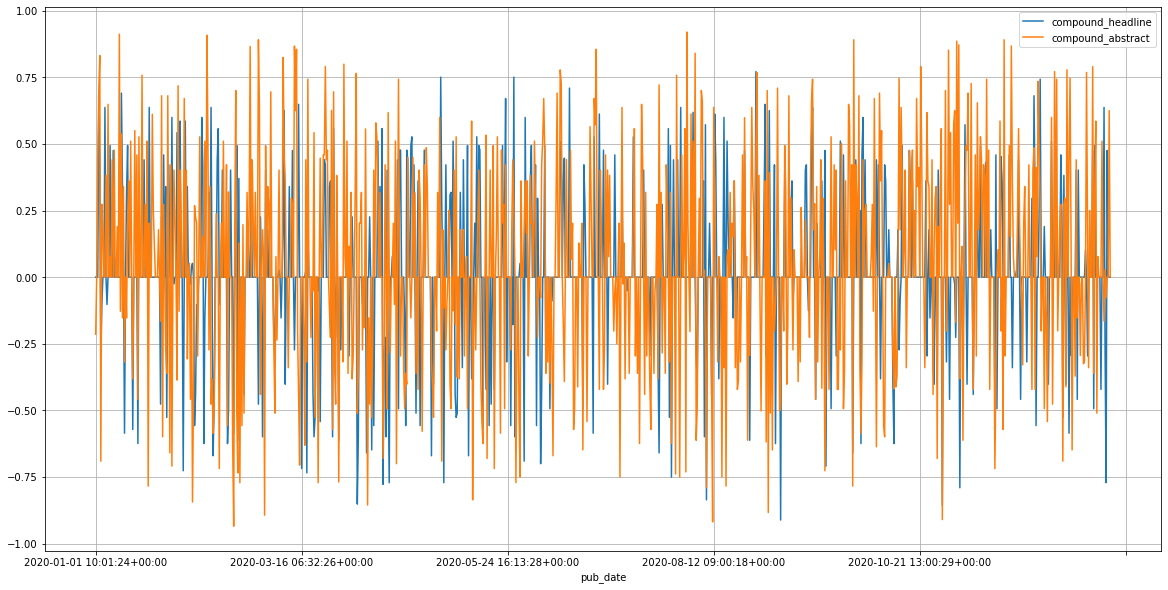

In [332]:
nyt3[['compound_headline','compound_abstract']].plot(y=['compound_abstract','compound_headline'], figsize=(20,10), grid=True)

In [372]:
nyt3.describe()

,compound_headline,neg_headline,neu_headline,pos_headline,compound_abstract,neg_abstract,neu_abstract,pos_abstract
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,0.011480,0.052808,0.883462,0.063729,0.046105,0.051491,0.878693,0.069828
std,0.274929,0.122685,0.172918,0.132152,0.369176,0.082251,0.119552,0.093393
min,-0.911800,0.000000,0.159000,0.000000,-0.934900,0.000000,0.470000,0.000000
25%,0.000000,0.000000,0.750500,0.000000,-0.102700,0.000000,0.800000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.895000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.296000,0.095000,1.000000,0.123500
max,0.771700,0.713000,1.000000,0.677000,0.920100,0.464000,1.000000,0.492000


In [374]:
headline_sentiment = nyt3['compound_headline'].mean()
abstract_sentiment = nyt3['compound_abstract'].mean()
print(f'The average compound score for headlines related to the housing market during 2020 is {headline_sentiment}. Which represents a neutral sentiment.')
print(f'The average compound score for headlines related to the housing market during 2020 is {abstract_sentiment}. Which represents a neutral sentiment.')

The average compound score for headlines related to the housing market during 2020 is 0.01148012170385396. Which represents a neutral sentiment.
The average compound score for headlines related to the housing market during 2020 is 0.04610476673427994. Which represents a neutral sentiment.
